In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### About the data:

- **age:** Age of the patient
- **anaemia:** If the patient had the haemoglobin below the normal range
- **creatinine_phosphokinase:** The level of the creatine phosphokinase in the blood in mcg/L
- **diabetes:** If the patient was diabetic
- **ejection_fraction:** Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction
- **high_blood_pressure:** If the patient had hypertension
- **platelets:** Platelet count of blood in kiloplatelets/mL
- **serum_creatinine:** The level of serum creatinine in the blood in mg/dL
- **serum_sodium:** The level of serum sodium in the blood in mEq/L
- **sex:** The sex of the patient
- **smoking:** If the patient smokes actively or ever did in past
- **time:** It is the time of the patient's follow-up visit for the disease in months
- ***DEATH_EVENT:*** If the patient deceased during the follow-up period

In [2]:
# Load the data
data_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
# Top 5 records
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Check columns data types
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# Missing values check
data_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
# Describe statistics on numerical data types
data_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


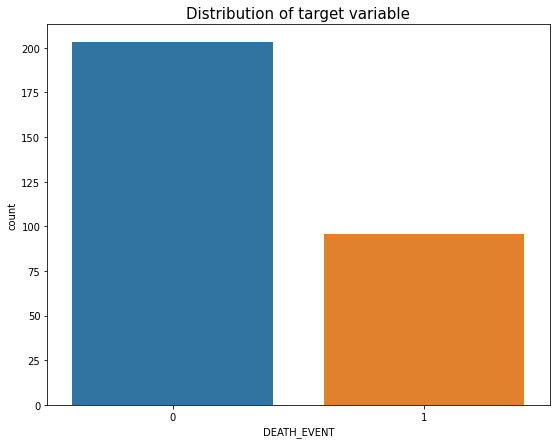

In [7]:
# Check distribution of target variable
plt.figure(figsize=(9,7))
sns.countplot(x=data_df['DEATH_EVENT'])
plt.title('Distribution of target variable', fontsize=15)
plt.show()

- This seems little imbalance dataset

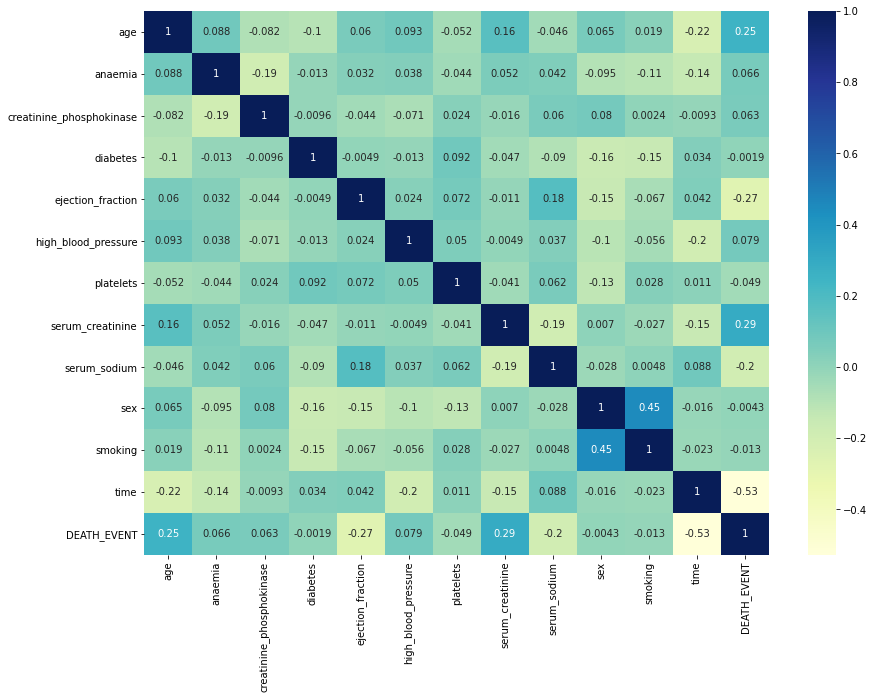

In [8]:
# Correlation HeatMap
plt.figure(figsize=(14,10))
corr = data_df.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

### Based on above heatmap
- There is no significant highly correlated features in the independent variables

### Based on domain knowledge
- Time of the patients follow up visits is crucial feature. More visits helps the patients in initial diagnosis and reduce fatality rate
- Smoking is also important feature to decide the fatality rate
- Ejection fraction is also quite important feature, basically it is efficiancy of the heart
- Age is inversely proportional to the heart functioning

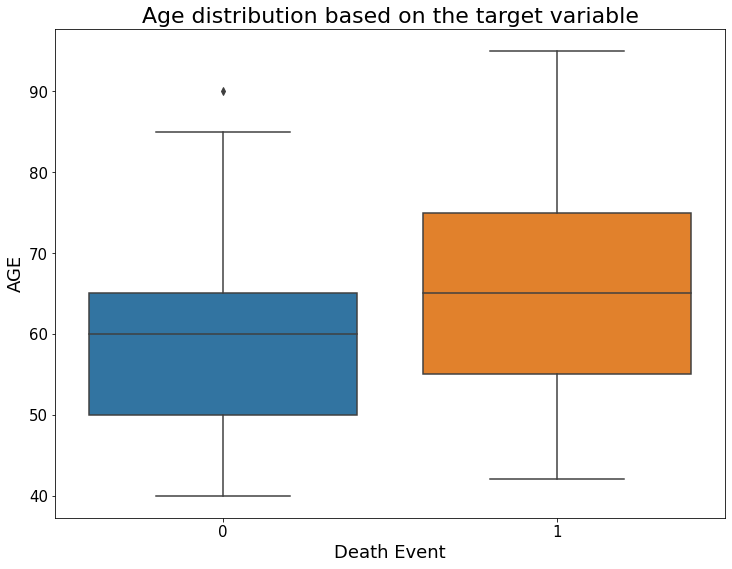

In [9]:
# Age distribution based on death event
plt.figure(figsize=(12,9))
sns.boxplot(data_df['DEATH_EVENT'], data_df['age'])
plt.title('Age distribution based on the target variable', fontsize=22)
plt.xlabel('Death Event',fontsize=18, color='Black')
plt.ylabel('AGE',fontsize=18, color='Black')
plt.xticks(fontsize=15, color='Black')
plt.yticks(fontsize=15, color='Black')
plt.show()

## Analysis of Survival based on Gender

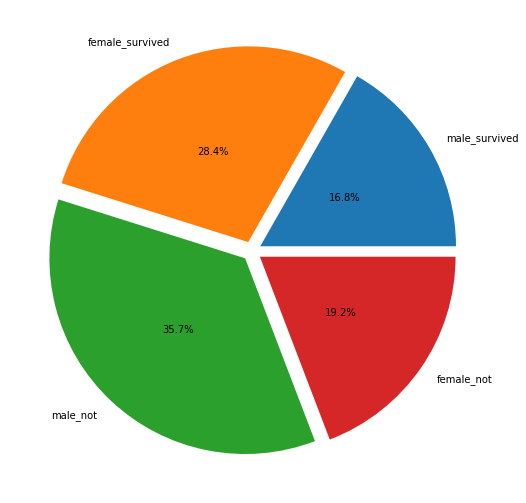

In [10]:
plt.figure(figsize=(12,9))
male_survival = data_df[(data_df['sex']==1) & (data_df['DEATH_EVENT']==1)]
female_survival = data_df[data_df['sex']==0 & (data_df['DEATH_EVENT']==1)]
male_not = data_df[(data_df['sex']==1) & (data_df['DEATH_EVENT']==0)]
female_not = data_df[(data_df['sex']==0) & (data_df['DEATH_EVENT']==0)]
labels = ['male_survived','female_survived','male_not','female_not']
values = [len(male_survival),len(female_survival),len(male_not),len(female_not)]
plt.pie(x=values, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.show()

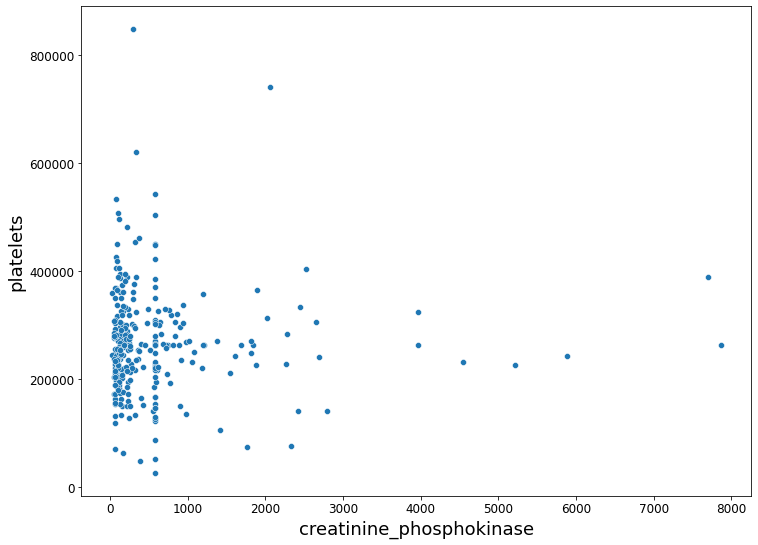

In [11]:
plt.figure(figsize=(12,9))
sns.scatterplot(data_df['creatinine_phosphokinase'], data_df['platelets'])
plt.xlabel('creatinine_phosphokinase',fontsize=18, color='Black')
plt.ylabel('platelets',fontsize=18, color='Black')
plt.xticks(fontsize=12, color='Black')
plt.yticks(fontsize=12, color='Black')
plt.show()

## Split data into train and test set

In [12]:
X = data_df.drop('DEATH_EVENT',axis=1)
Y = data_df['DEATH_EVENT']
print(X.shape)
print(Y.shape)

(299, 12)
(299,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y,train_size=0.8,random_state=45,stratify=Y)

In [14]:
print('Train X set shape: {}'.format(X_train.shape))
print('Train Y set shape: {}'.format(y_train.shape))
print('Test X set shape: {}'.format(X_test.shape))
print('Test Y set shape: {}'.format(y_test.shape))

Train X set shape: (239, 12)
Train Y set shape: (239,)
Test X set shape: (60, 12)
Test Y set shape: (60,)


In [15]:
print('Training distribution:\n{}'.format(y_train.value_counts()))
print('Test distribution:\n{}'.format(y_test.value_counts()))

Training distribution:
0    162
1     77
Name: DEATH_EVENT, dtype: int64
Test distribution:
0    41
1    19
Name: DEATH_EVENT, dtype: int64


## Standardization

In [16]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
train_X_std = scale.fit_transform(X_train)
X_test_std = scale.fit_transform(X_test)

## Feature Importance


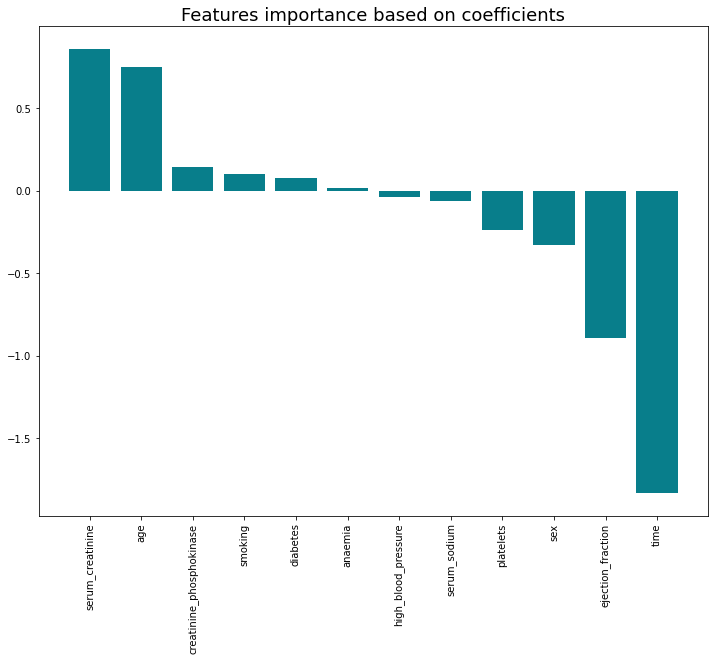

In [17]:
from sklearn.linear_model import LogisticRegression
model_lr_imp = LogisticRegression()
model_lr_imp.fit(train_X_std, y_train)
importances = pd.DataFrame(data={
    'features':X.columns,
    'Importance':model_lr_imp.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12,9))
plt.bar(x=importances['features'], height=importances['Importance'], color='#087E8B')
plt.title('Features importance based on coefficients', size=18)
plt.xticks(rotation='vertical')
plt.show()

- If assigned coefficient is a large value (negative or positive), it has some influence on the prediction
- ***anaemia*** and ***high_blood_pressure*** having lowest impact on prediction

In [18]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [19]:
X_imp = X[['age','creatinine_phosphokinase','diabetes','ejection_fraction','platelets','serum_creatinine','serum_sodium','smoking','time']]
X_imp.head()

,age,creatinine_phosphokinase,diabetes,ejection_fraction,platelets,serum_creatinine,serum_sodium,smoking,time
0,75.0,582,0,20,265000.00,1.9,130,0,4
1,55.0,7861,0,38,263358.03,1.1,136,0,6
2,65.0,146,0,20,162000.00,1.3,129,1,7
3,50.0,111,0,20,210000.00,1.9,137,0,7
4,65.0,160,1,20,327000.00,2.7,116,0,8


## Modeling after feature selection

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, roc_auc_score, classification_report
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp ,Y,train_size=0.8,random_state=45,stratify=Y)
train_X_imp = scale.fit_transform(X_train_imp)
X_test_imp = scale.fit_transform(X_test_imp)


model_lr0 = LogisticRegression(random_state=45)
model_lr0.fit(train_X_imp, y_train_imp)
y_pred_lr0 = model_lr0.predict(X_test_imp)
print(classification_report(y_test_imp, y_pred_lr0))


              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.55      0.58      0.56        19

    accuracy                           0.72        60
   macro avg       0.68      0.68      0.68        60
weighted avg       0.72      0.72      0.72        60



## Modeling consist all features

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, roc_auc_score, classification_report
model_lr = LogisticRegression(random_state=45)
model_lr.fit(train_X_std, y_train)
y_pred_lr = model_lr.predict(X_test_std)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.58      0.58      0.58        19

    accuracy                           0.73        60
   macro avg       0.69      0.69      0.69        60
weighted avg       0.73      0.73      0.73        60



In [22]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=45,max_depth=5,min_samples_leaf=25)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        41
           1       0.54      0.68      0.60        19

    accuracy                           0.72        60
   macro avg       0.69      0.71      0.69        60
weighted avg       0.74      0.72      0.72        60



In [23]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=200,max_depth=3,min_samples_leaf=25)
model_rfc.fit(X_train, y_train)
y_pred_rfc = model_rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        41
           1       0.82      0.47      0.60        19

    accuracy                           0.80        60
   macro avg       0.81      0.71      0.73        60
weighted avg       0.80      0.80      0.78        60



## Hyper parameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV
modeldt= DecisionTreeClassifier(random_state=45)
params={'max_depth': [3,5,7,9,12],'min_samples_leaf': [10,25,30,60,90],'criterion': ["gini", "entropy"]}
cv_model = GridSearchCV(estimator=modeldt,param_grid=params,cv=5,n_jobs=8,verbose=1,scoring='accuracy')
cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=45), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 12],
                         'min_samples_leaf': [10, 25, 30, 60, 90]},
             scoring='accuracy', verbose=1)

In [25]:
cv_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=10,
                       random_state=45)

In [26]:
modeldt2 = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=10,
                       random_state=45)
modeldt2.fit(X_train, y_train)
y_pred_dt2 = modeldt2.predict(X_test)
print(classification_report(y_test, y_pred_dt2))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        41
           1       0.67      0.53      0.59        19

    accuracy                           0.77        60
   macro avg       0.73      0.70      0.71        60
weighted avg       0.76      0.77      0.76        60



In [27]:
model_rfc2 = RandomForestClassifier(random_state=45)
params_2 ={'n_estimators':[50,100,150,170],'max_depth': [3,5,7,9,12],'min_samples_leaf': [10,25,30,60,90],'criterion': ["gini", "entropy"]}
cv_model_2 = GridSearchCV(estimator=model_rfc2,param_grid=params_2,cv=5,n_jobs=8,verbose=1,scoring='accuracy')
cv_model_2.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=45), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 12],
                         'min_samples_leaf': [10, 25, 30, 60, 90],
                         'n_estimators': [50, 100, 150, 170]},
             scoring='accuracy', verbose=1)

In [28]:
cv_model_2.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=150,
                       random_state=45)

In [29]:
model_rfc_3 = RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=150,
                       random_state=45)
model_rfc_3.fit(X_train, y_train)
y_pred_rfc_3 = model_rfc_3.predict(X_test)
print(classification_report(y_test, y_pred_rfc_3))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.79      0.58      0.67        19

    accuracy                           0.82        60
   macro avg       0.81      0.75      0.77        60
weighted avg       0.81      0.82      0.81        60



## Best model selection (Random Forest Classifier after hyperparameter tuning)

In [30]:
import pickle
model_file = open('RF_model.pkl','wb')
pickle.dump(model_rfc_3, model_file)

In [31]:
# Test
model_name = 'RF_model.pkl'
classifier = pickle.load(open(model_name, 'rb'))

In [37]:
test_pred = classifier.predict(X_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.79      0.58      0.67        19

    accuracy                           0.82        60
   macro avg       0.81      0.75      0.77        60
weighted avg       0.81      0.82      0.81        60

